In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Beer Style Classifier
In the beer dataset I used, there were over 2000 beers, with styles ranging from IPAs and Sours, to Stouts and Ciders. I plan to use a beer's International Bitterness Unit or how bitter a beer is (IBU), and Alcohol by Volume or how much alcohol is in a beer(ABV), to classify diffterent styles of beer. 

In [3]:
beers_df = pd.read_csv('beers.csv')

In [4]:
beers_df['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Braggot                             1
American Malt Liquor                1
Smoked Beer                         1
Flanders Red Ale                    1
Low Alcohol Beer                    1
Name: style, Length: 99, dtype: int64

In [5]:
beers_df.count()

Unnamed: 0    2410
abv           2348
ibu           1405
id            2410
name          2410
style         2405
brewery_id    2410
ounces        2410
dtype: int64

#### Dropping null values
Different styles of beer have their own range of IBU and ABV, however some styles don't even keep track of bitterness because their style ranges so much, for example according to craftbeers.com an American Sour ranges on all three major units of measurement IBU, ABV, and SRM (which we will get later on).

Because of this, many styles in this dataset don't include their ibu at all. That being said it would be virtually impossible for the model to predict that particular style. So this is where we will drop the null values that we don't need

In [6]:
beers = beers_df.dropna()

In [7]:
beers['style'].value_counts()

American IPA                          301
American Pale Ale (APA)               153
American Amber / Red Ale               77
American Double / Imperial IPA         75
American Pale Wheat Ale                61
                                     ... 
English Stout                           1
American Double / Imperial Pilsner      1
Smoked Beer                             1
English Pale Mild Ale                   1
Quadrupel (Quad)                        1
Name: style, Length: 90, dtype: int64

In [8]:
beers.count()

Unnamed: 0    1403
abv           1403
ibu           1403
id            1403
name          1403
style         1403
brewery_id    1403
ounces        1403
dtype: int64

Doing this got rid of 9 different styles of beer and 1,007 unique beers.

## Narrowing down the categories

Obviously a classification problem with 90 different catagories would be nearly impossible espessially considering many of the styles only have 1 instance of itself (Roggenbier, American Double / Imperial Pilsner). 

So my next goal was to take all 90 categories and narrow them down to a realistic number for a classifcation problem. My Goal was around 8 or so styles. I got to work researching different, what I referr to as categories, of beer. 

### Initial Category Ideas

My first ideas for categories included IPA, Pale ale, Stout, Porter, Wheat, Bock, and Vienna Lagers

However looking at how many of each of those category it was very skewed and I knew I needed to keep some and get rid of others. 
I found a good article that outlined different categories of beers https://www.webstaurantstore.com/article/27/different-types-of-beers.html#wild-sour-ale

It outlined these categories of beer 
- Pale Lager and Pilsner
- Brown Ale
- Porter
- Wheat Beer
- Dark Lager
- Pale ale
- Stout
- Wild & Sour ale
- German Bock
- India Pale Ale
- Belgian Style Ale
- Specialty Beer

Knowing that beer categories like **Specialty Beer** and **Wild and Sour Ale** weren't in my dataset anymore I wasn't going to worry about them. I also knew a category like **Bock** only had 13 instances so that wouldn't be enough data for one category so I stuck with the other 9 

## Clarification:
#### Style vs Category
- Category is going to be my umbrella term that consists of **multiple** categories 
- ie. in the Category Stout, styles may include, Oatmeal Stout, English Stout, Irish Dry Stout etc. 

There are so many styles of beer in the dataset but they can be compressed into fewer categories

### Categorizing 
Below is an example of how I categorized beers of category 
## Pale Ale

First I created a temperary data frame called **pale_ale** and found the different styles of beer that could be categorized as a **Pale Ale**

In [9]:
pale_ale = beers[(beers['style']=='English Pale Ale')|
                (beers['style']=='American Pale Ale (APA)')|
                (beers['style'] == 'English Bitter')|
                (beers['style'] == 'American Blonde Ale')|
                (beers['style'] == 'American Amber / Red Ale')|
                (beers['style']=='Irish Red Ale')]

By doing this I can now see statistics on beers that are in this category

In [10]:
pale_ale.ibu.mean()

37.21172638436482

In [11]:
pale_ale.abv.mean()

0.05435830618892503

In [12]:
pale_ale.count() # number of unique beers in this category

Unnamed: 0    307
abv           307
ibu           307
id            307
name          307
style         307
brewery_id    307
ounces        307
dtype: int64

**I continued this Process for the other categories of beer**

## Brown Ale (59 unique beers)

In [13]:
brown_ale = beers[(beers['style']=='American Brown Ale')|
                 (beers['style']=='English Brown Ale')|
                  (beers['style']=='Scottish Ale')]

## Pilsner or Pale Lager (90 unique beers)

In [14]:
pilsner = beers[(beers['style']=='American Pale Lager')|
      (beers['style']=='American India Pale Lager')|
      (beers['style']=='Euro Pale Lager')|
      (beers['style']=='American Pilsner')|
      (beers['style']=='Czech Pilsener')|
      (beers['style']=='Munich Helles Lager')|
      (beers['style']=='German Pilsener')|
      (beers['style']=='American Adjunct Lager')]

## Wheat Beer (125 unique beers)

In [15]:
wheats = beers[(beers['style']=='American Pale Wheat Ale')|
              (beers['style']=='American Dark Wheat Ale')|
              (beers['style']=='Wheat Ale')|
              (beers['style']=='Hefeweizen')|
              (beers['style']=='Berliner Weissbier')|
              (beers['style']=='Witbier')|
              (beers['style']=='Dunkelweizen')]

## IPA (392 unique beers)

In [16]:
ipa = beers[(beers['style']=='American IPA')|
            (beers['style']=='English India Pale Ale (IPA)')|
            (beers['style']=='American Double / Imperial IPA')|
            (beers['style']=='Belgian IPA')|
            (beers['style']=='American White IPA')]

## Porter (62 unique beers)

In [17]:
porters = beers[(beers['style']=='American Porter')|
               (beers['style']=='Baltic Porter')|
               (beers['style']=='American Black Ale')]

## Stouts (51 unique beers)

In [18]:
stouts = beers[(beers['style']=='American Stout')| 
          (beers['style']=='Russian Imperial Stout')|
          (beers['style'] =='Milk / Sweet Stout')|
          (beers['style'] == 'American Double / Imperial Stout')|
          (beers['style']=='Foreign / Export Stout')|
          (beers['style']=='English Stout')|
          (beers['style']=='Irish Dry Stout')|
          (beers['style']=='Oatmeal Stout')]

## Dark Lager (59 unique beers)

In [19]:
dark_lager = beers[(beers['style']=='Märzen / Oktoberfest')|
               (beers['style']=='Schwarzbier')|
               (beers['style']=='Vienna Lager')|
               (beers['style']=='American Amber / Red Lager')|
               (beers['style']=='Euro Dark Lager')]

## Belgian Style (43 unique beers)

In [20]:
belgian = beers[(beers['style']=='Belgian Pale Ale')|
               (beers['style']=='Belgian Strong Pale Ale')|
               (beers['style']=='Belgian Dark Ale')|
               (beers['style']=='Saison / Farmhouse Ale')|
               (beers['style']=='Tripel')|
               (beers['style']=='Dubbel')|
               (beers['style']=='Flanders Oud Bruin')]

**At this point I have 9 different data frames where the smallest one has 42 values. The rest of the styles I either could not fit into just one particular category or only had a few instances where adding one to 2 more beers to a data frame would not make a difference so I continued with these categories**

# Mapping Categories to numbers to help the model
I assigned each category a number 0-8 and dropped the category column

In [21]:
ipa['category'] = 0
stouts['category'] = 1
porters['category'] = 2
pilsner['category'] = 3
wheats['category'] = 4
brown_ale['category'] = 5
pale_ale['category'] = 6
belgian['category'] = 7
dark_lager['category'] = 8

In [22]:
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
14,14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
21,21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
22,22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
24,24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
25,25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0


**Now let's clean our data frame so we only have the columns we need**

In [23]:
beers

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
14,14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
21,21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
22,22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
24,24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
25,25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0
...,...,...,...,...,...,...,...,...
2398,2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0
2399,2399,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0
2400,2400,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0


## Standard Reference Method (SRM) is a way to quantify a beer's color

Originally used to predict how dark or light a beer will be before it is brewed, its calculation is based on how many **black-type malts** vs **red-type malts** you include in the brewing process.

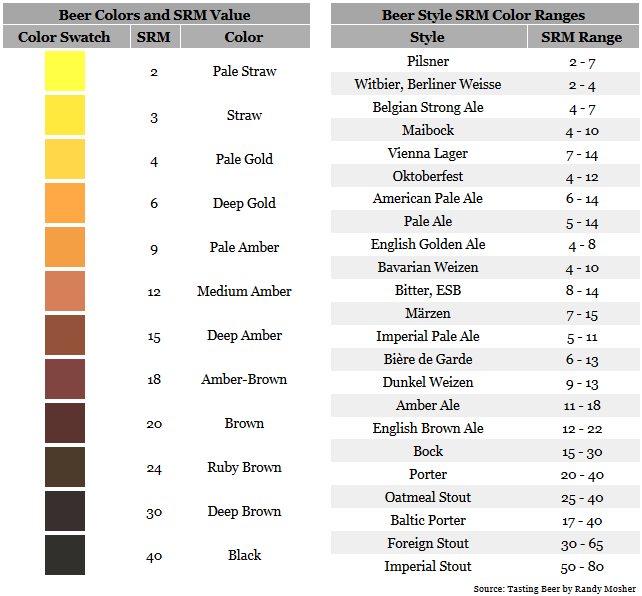

### With the above Chart I will be able to assign a random integer between a category's range of SRMs to hopefully improve my accuracy 

for instance I would make my stouts have an SRM of between 25 and 80, since there are three different styles of stout but they are all in my category of stout. 

**I plan to do this in a similar way I added the category column, by adding another column called srm**

each line is saying, 
- for each row in this data frame, assign a random number between these two values into a new column called SRM

In [24]:
ipa['SRM'] = [np.random.randint(low=5,high=12) for k in ipa.index]

In [77]:
ipa['SRM'] = [np.random.randint(low=5,high=12) for k in ipa.index]
stouts['SRM'] = [np.random.randint(low=25,high=81) for k in stouts.index]
porters['SRM'] = [np.random.randint(low=17,high=40) for k in porters.index]
pilsner['SRM'] = [np.random.randint(low=2,high=8) for k in pilsner.index]
wheats['SRM'] = [np.random.randint(low=2,high=5) for k in wheats.index]
brown_ale['SRM'] = [np.random.randint(low=12,high=23) for k in brown_ale.index]
pale_ale['SRM'] = [np.random.randint(low=5,high=15) for k in pale_ale.index]
belgian['SRM'] = [np.random.randint(low=4,high=8) for k in belgian.index]

#my dark lagers consisted of Vienna Lagers and Oktoberfest so I combined the two to get the range I used
dark_lager['SRM'] = [np.random.randint(low=6,high=16) for k in dark_lager.index]

I now needed to concatenate these data frames once again and assign them to the beers data frame

In [78]:
frames = [ipa, stouts, porters, pilsner, wheats, brown_ale, pale_ale, belgian, dark_lager]
beers = pd.concat(frames)
beers.drop(['style', 'ounces', 'id', 'name', 'brewery_id', 'Unnamed: 0'], axis=1, inplace=True)
beers.columns

Index(['abv', 'ibu', 'category', 'SRM'], dtype='object')

In [79]:
beers

,abv,ibu,category,SRM
28,0.070,70.0,0,6
29,0.070,70.0,0,9
30,0.070,70.0,0,10
32,0.097,94.0,0,11
37,0.070,65.0,0,6
...,...,...,...,...
2252,0.040,22.0,8,13
2256,0.040,32.0,8,7
2291,0.048,15.0,8,15
2292,0.048,22.0,8,7


## Downsample here

In [80]:
from sklearn.utils import resample
df_dsmpl1 = resample(ipa,replace=False, n_samples = 43, random_state=99)
df_dsmpl2 = resample(stouts,replace=False, n_samples = 43, random_state=99)
df_dsmpl3 = resample(pilsner,replace=False, n_samples = 43, random_state=99)
df_dsmpl4 = resample(wheats,replace=False, n_samples = 43, random_state=99)
df_dsmpl5 = resample(brown_ale,replace=False, n_samples = 43, random_state=99)
df_dsmpl6 = resample(pale_ale,replace=False, n_samples = 43, random_state=99)
df_dsmpl7 = resample(dark_lager,replace=False, n_samples = 43, random_state=99)
df_dsmpl8 = resample(porters,replace=False, n_samples = 43, random_state=99)

In [81]:
frames = [df_dsmpl1, df_dsmpl2, df_dsmpl3, df_dsmpl4, df_dsmpl5, df_dsmpl6, df_dsmpl7, df_dsmpl8, belgian]
beers = pd.concat(frames)

In [82]:
#Baseline
beers.category.value_counts(normalize=True)

8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
0    0.111111
Name: category, dtype: float64

## Let's assign X and y

In [83]:
feature_cols = ['abv', 'ibu','SRM']
X = beers[feature_cols]
y = beers['category']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=99,stratify=y)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X_train, y_train,cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.62903226 0.56451613 0.58064516 0.58064516 0.68852459]


In [88]:
(scores.mean()*100).round()

61.0

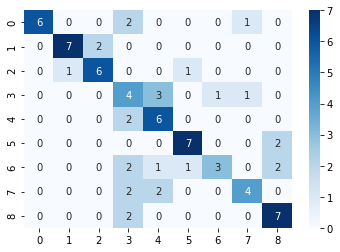

In [89]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
sns.heatmap(c, annot=True,cmap='Blues');

**reminder on what values are which category**
- ipa: 0
- stouts: 1
- porters: 2
- pilsner: 3
- wheats: 4
- brown_ale: 5
- pale_ale: 6
- belgian: 7
- dark_lager: 8